In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

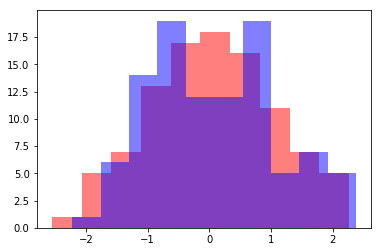

In [3]:
dis1 = np.random.randn(100,1) ;  dis2 = np.random.randn(100,1); plt.hist(dis1,color='Red',alpha=0.5) ; plt.hist(dis2,color='Blue',alpha=0.5) ; plt.show()

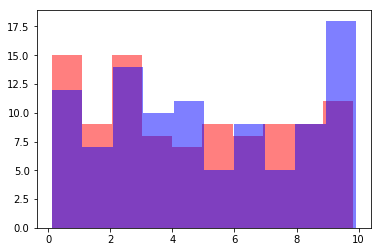

[[9.61936379 2.92147527 2.4082878 ]] [[3.92675677 9.56405723 1.87130892]]


In [4]:
dis1 = np.random.uniform(low=0,high=10,size=(100,1)) ;  dis2 = np.random.uniform(low=0,high=10,size=(100,1))
plt.hist(dis1,color='Red',alpha=0.5) ; plt.hist(dis2,color='Blue',alpha=0.5) ; plt.show()
print(dis1[:3].T,dis2[:3].T)

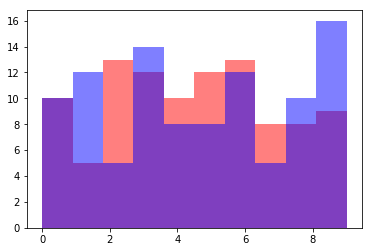

[7 8 2] [6 8 6]


In [5]:
elements      = [0,1,2,3,4,5,6,7,8,9,10]
probabilities = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0]
dis1 = np.random.choice(elements, 100, p=probabilities) ; dis2 = np.random.choice(elements, 100, p=probabilities)
plt.hist(dis1,color='Red',alpha=0.5); plt.hist(dis2,color='Blue',alpha=0.5) ; plt.show()
print(dis1[:3].T,dis2[:3].T)

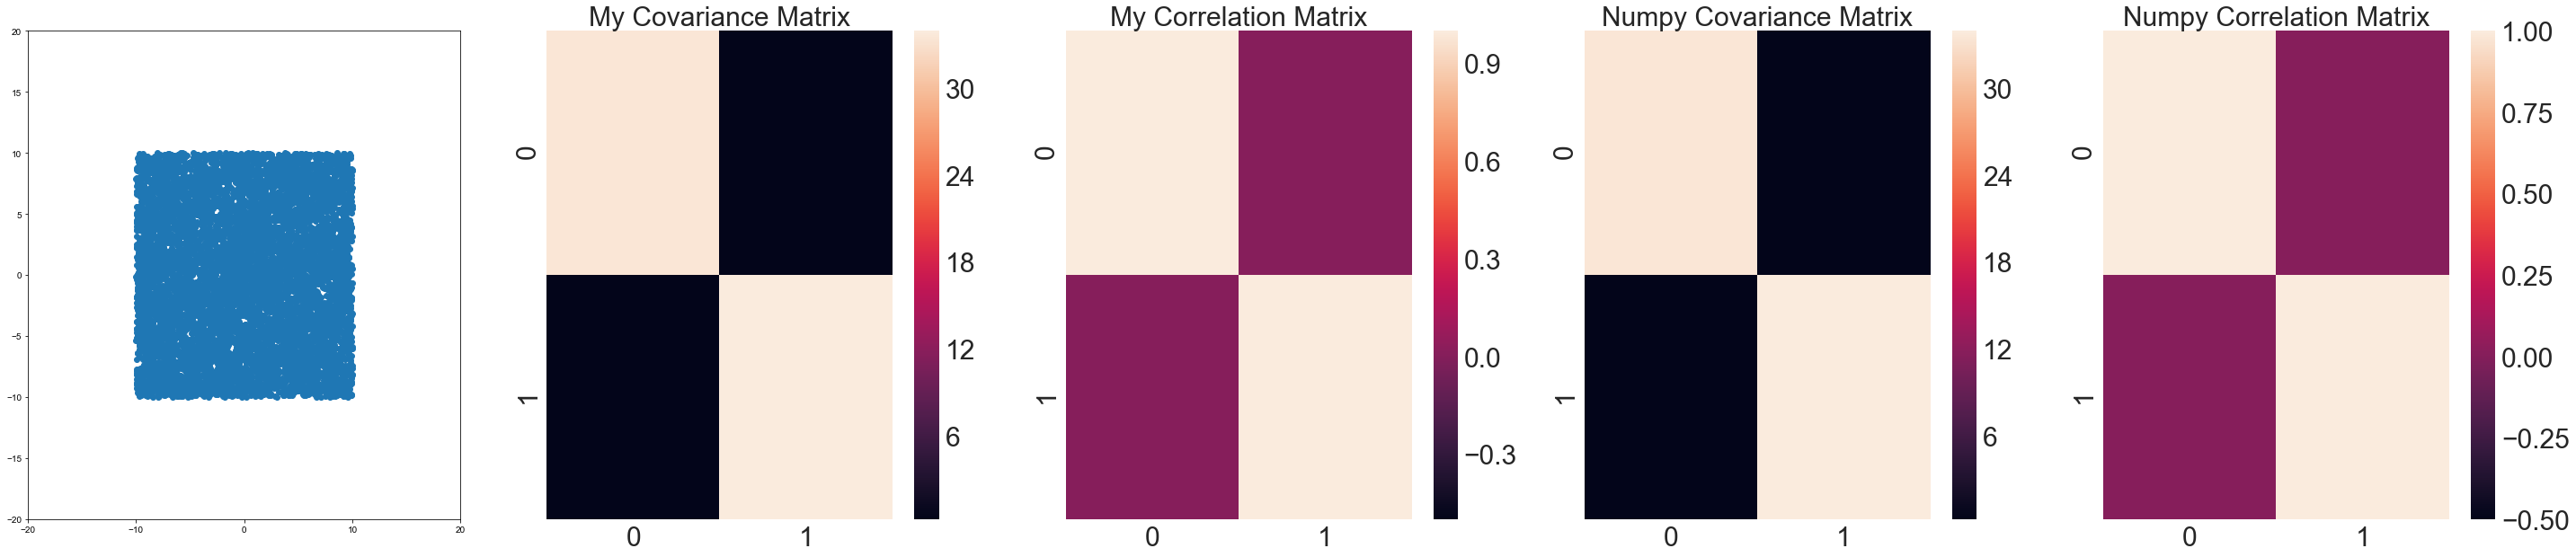

In [6]:
dis1 = np.random.uniform(low=-10,high=10,size=(9000,1)) ;  dis2 = np.random.uniform(low=-10,high=10,size=(9000,1))
plt.figure(figsize=(50,10))

plt.subplot(151); plt.xlim(-20,20);plt.ylim(-20,20); plt.scatter(dis1,dis2)

dis_all = np.hstack((dis1,dis2))
dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])

sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap(correlation_mat,vmin=-0.5); plt.title('My Correlation Matrix',fontsize=30);

dis_all = np.hstack((dis1,dis2))
plt.subplot(154); sns.heatmap(np.cov(dis_all.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(dis_all.T) ,vmin=-0.5); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

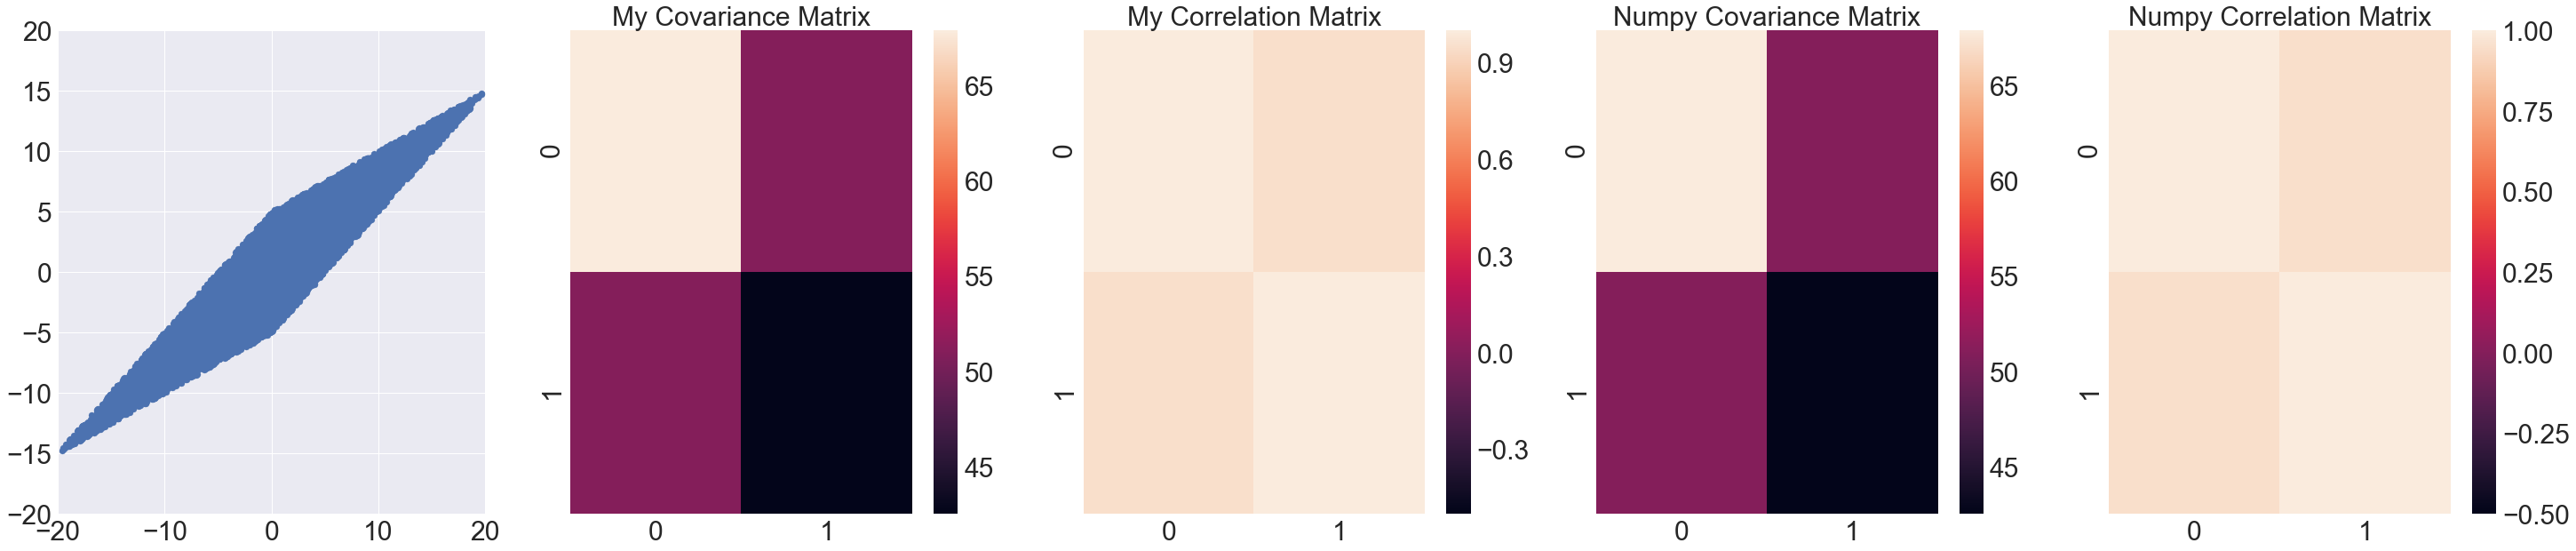

In [7]:
dis_all = np.hstack((dis1,dis2))
mix_matrix = np.array([
    [1,0.5],
    [1,1]
])
dis_mixed = dis_all @ mix_matrix

plt.figure(figsize=(50,10))
plt.subplot(151); plt.xlim(-20,20);plt.ylim(-20,20); plt.scatter(dis_mixed[:,0],dis_mixed[:,1])

dis_all = dis_mixed
dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])
sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap(correlation_mat,vmin=-0.5);  plt.title('My Correlation Matrix',fontsize=30);

dis_all = np.hstack((dis1,dis2))
dis_mixed = dis_all @ mix_matrix
plt.subplot(154); sns.heatmap(np.cov(dis_mixed.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(dis_mixed.T),vmin=-0.5 ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

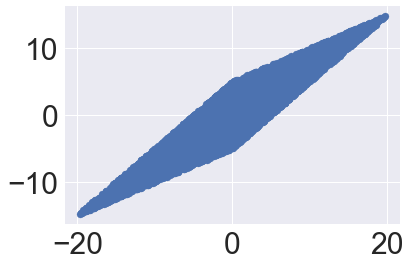

In [8]:
# preprocess the data
dis_all = np.hstack((dis1,dis2))
mix_matrix = np.array([[1,0.5],[1,1]])
dis_mixed = dis_all @ mix_matrix
plt.scatter(dis_mixed[:,0],dis_mixed[:,1]);plt.show()

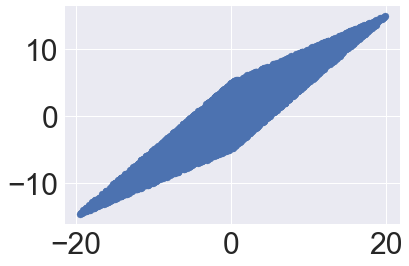

In [9]:
dis_mixed_cen = dis_mixed - dis_mixed.mean(0)
plt.scatter(dis_mixed_cen[:,0],dis_mixed_cen[:,1]);plt.show()

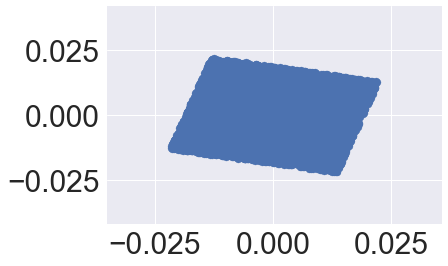

In [10]:
cov = np.dot(dis_mixed_cen.T, dis_mixed_cen)
#   d = (lambda1, lambda2, ..., lambdaN)
d, E = np.linalg.eigh(cov)
#   D = diag(d) ^ (-1/2)
D = np.diag(1. / np.sqrt(d + 10e-5))
#   W_zca = E * D * E.T
W = np.dot(np.dot(E, D), E.T)
X_white = np.dot(dis_mixed_cen, W)
plt.scatter(X_white[:,0],X_white[:,1]);plt.show()

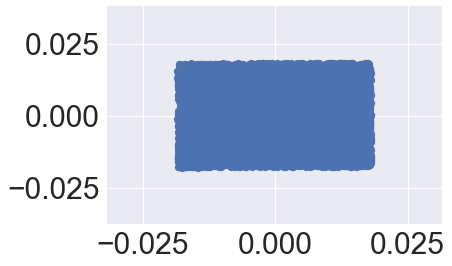

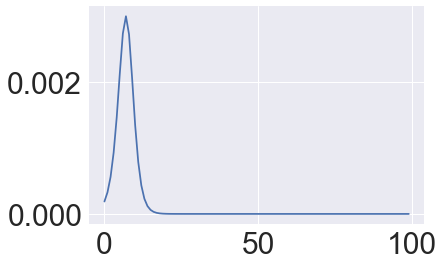

In [11]:

def _cube(x):
    return x ** 3, (3 * x ** 2).mean(axis=0)

def _sym_decorrelation(W):
    """ Symmetric decorrelation
    i.e. W <- (W * W.T) ^{-1/2} * W
    """
    s, u = np.linalg.eigh(np.dot(W, W.T))
    # u (resp. s) contains the eigenvectors (resp. square roots of
    # the eigenvalues) of W * W.T
    return np.dot(np.dot(u * (1. / np.sqrt(s)), u.T), W)

np.random.seed(40)
# 20 - good choice 
# 40 - good choice
unmixing_matrix = _sym_decorrelation(np.random.randn(2,2))

all_w1_values = []
for _ in range(100):
    gwtx, g_wtx = _cube(X_white @ unmixing_matrix  )
    W1 = _sym_decorrelation(np.dot(gwtx.T, X_white) / X_white.shape[1]   - g_wtx[:,np.newaxis]  * unmixing_matrix)
    lim = max(abs(abs(np.diag(np.dot(W1, unmixing_matrix.T))) - 1))
    all_w1_values.append(lim)
    unmixing_matrix = W1
        
final = X_white @ unmixing_matrix
plt.scatter(final[:,0],final[:,1]);plt.show()
plt.plot(all_w1_values);plt.show()

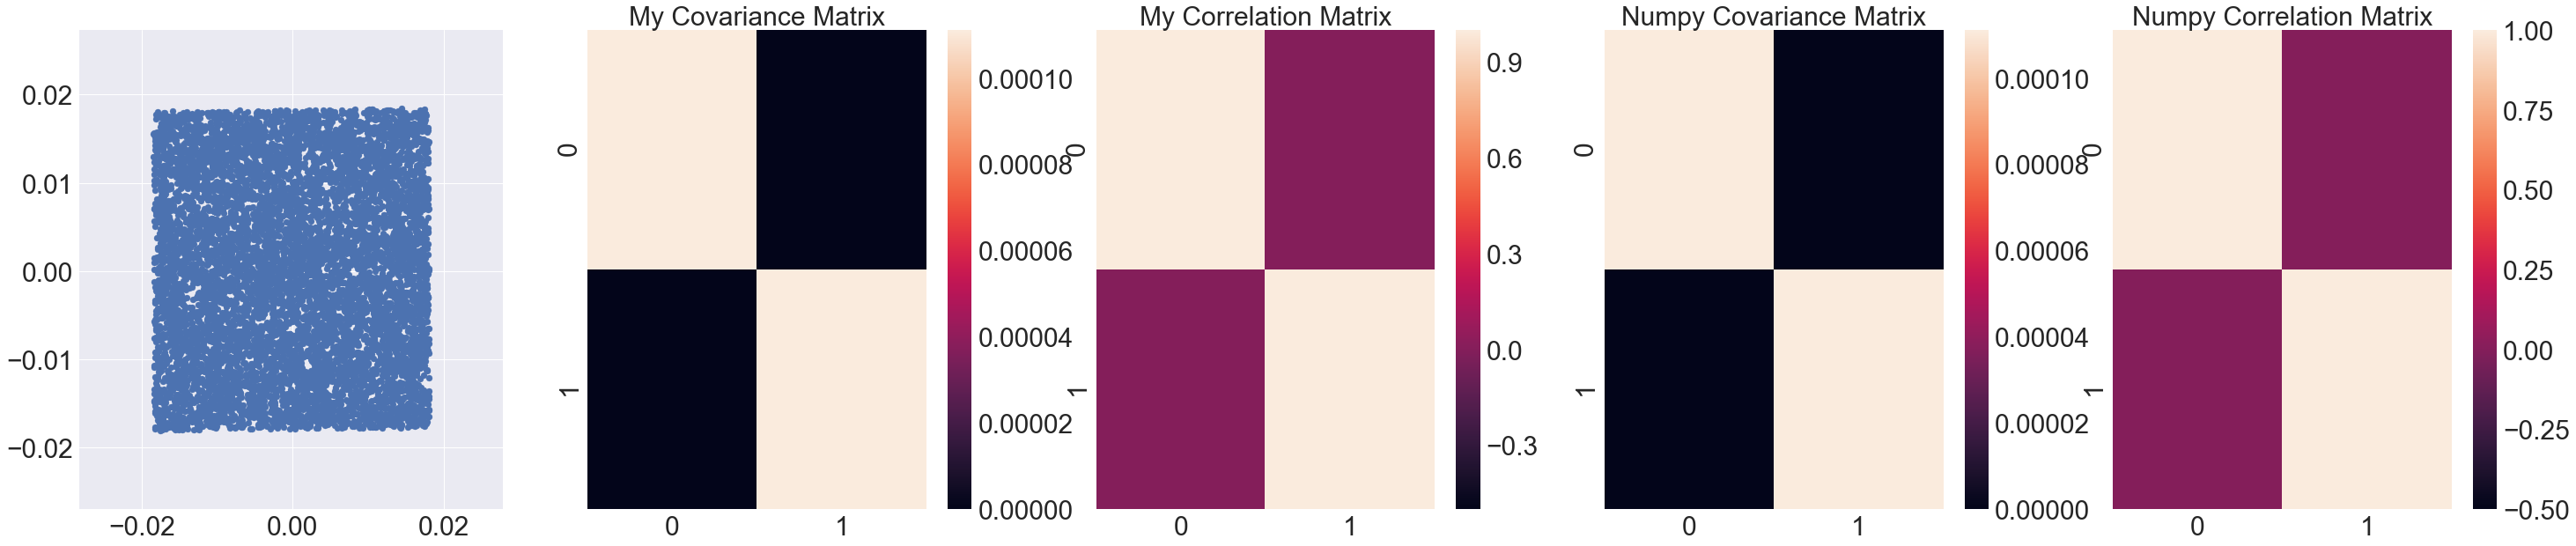

In [12]:
plt.figure(figsize=(50,10))
plt.subplot(151);  plt.scatter(final[:,0],final[:,1])

dis_all = final
dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])
sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap(correlation_mat,vmin=-0.5);  plt.title('My Correlation Matrix',fontsize=30);

plt.subplot(154); sns.heatmap(np.cov(final.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(final.T),vmin=-0.5 ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

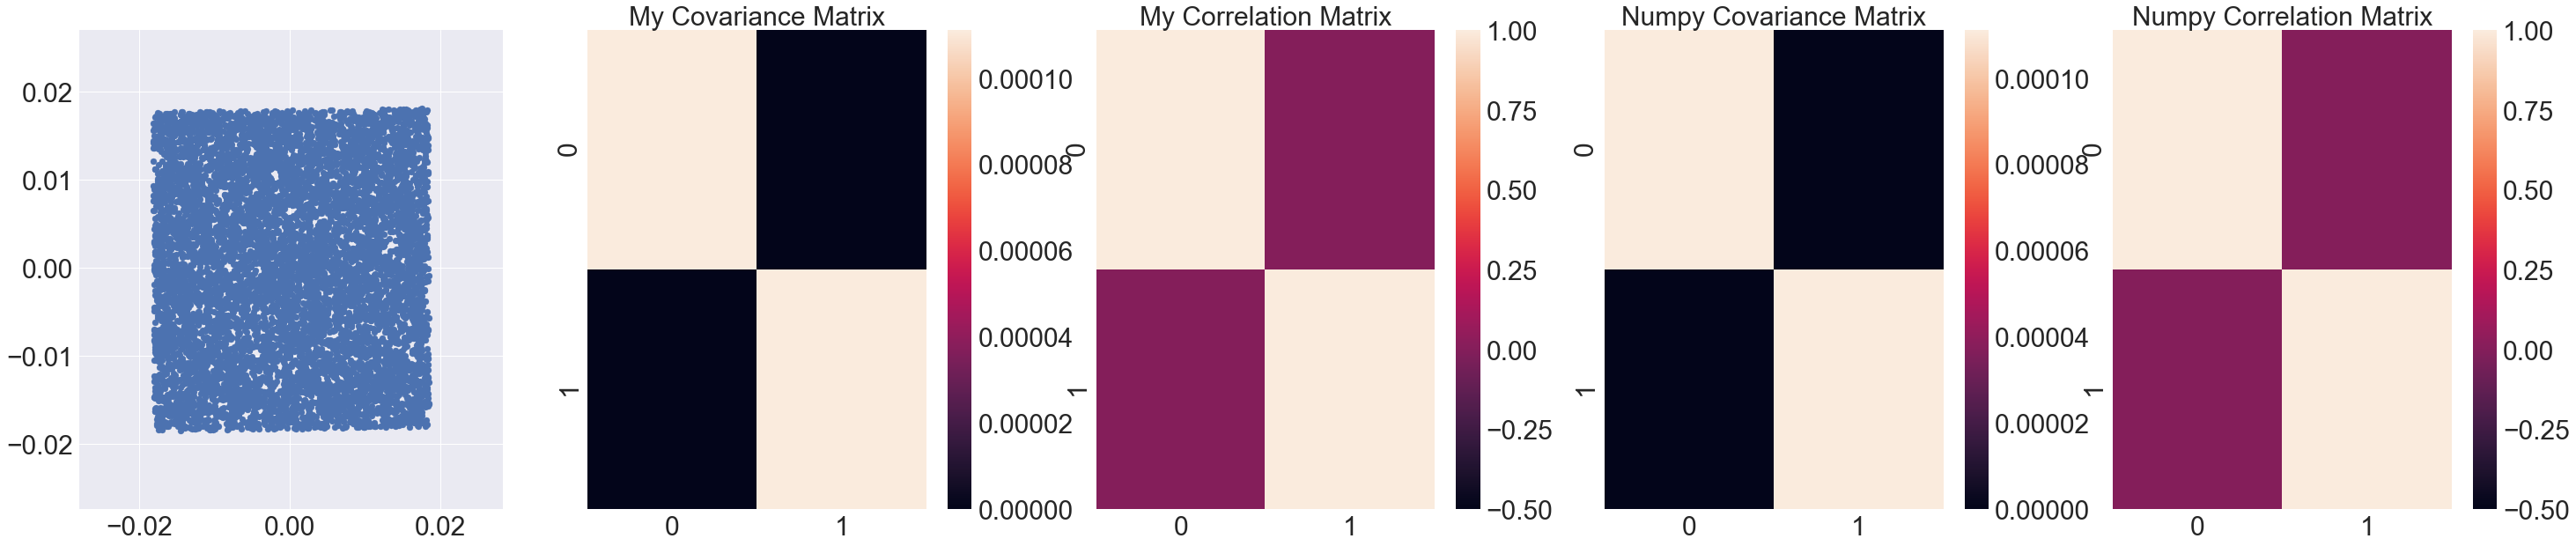

In [13]:
from sklearn.decomposition import FastICA
sk_ica = FastICA()
temp = sk_ica.fit_transform(dis_mixed)

plt.figure(figsize=(50,10)); plt.subplot(151);  plt.scatter(temp[:,0],temp[:,1])

dis_all = temp
dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])
sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap(correlation_mat,vmin=-0.5);  plt.title('My Correlation Matrix',fontsize=30);

plt.subplot(154); sns.heatmap(np.cov(temp.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(temp.T),vmin=-0.5 ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

In [87]:
# import the MNIST Data
import tensorflow as tf
import numpy as np
import sys, os,cv2
from sklearn.utils import shuffle
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage.transform import resize
from imgaug import augmenters as iaa
import imgaug as ia
from scipy.ndimage import zoom
import seaborn as sns
from scipy import linalg as LA

np.random.seed(0)
np.set_printoptions(precision = 3,suppress =True)
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets('../../Dataset/MNIST/', one_hot=True)
mnist = input_data.read_data_sets('../../Dataset/fashionmnist/',one_hot=True)
train_data, train_label, test_data, test_label = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting ../../Dataset/fashionmnist/train-images-idx3-ubyte.gz
Extracting ../../Dataset/fashionmnist/train-labels-idx1-ubyte.gz
Extracting ../../Dataset/fashionmnist/t10k-images-idx3-ubyte.gz
Extracting ../../Dataset/fashionmnist/t10k-labels-idx1-ubyte.gz


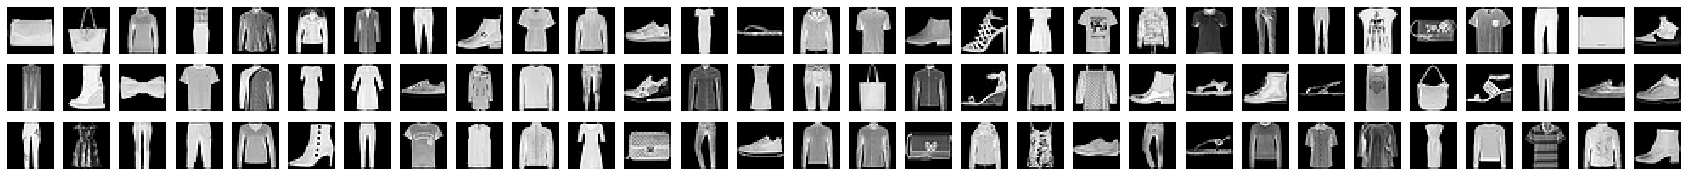

In [88]:

def showimages(x,coloums=30,row=3,col=False):
    fig=plt.figure(figsize=(30, 3))
    columns = coloums; rows = row
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        if col: plt.imshow(np.squeeze(x[i-1]))
        else:   plt.imshow(np.squeeze(x[i-1]),cmap='gray')
        plt.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
        plt.grid(False)
    plt.show()
train_data = shuffle(train_data)
sns.set(font_scale=1.)
showimages(train_data.reshape(train_data.shape[0],28,28))

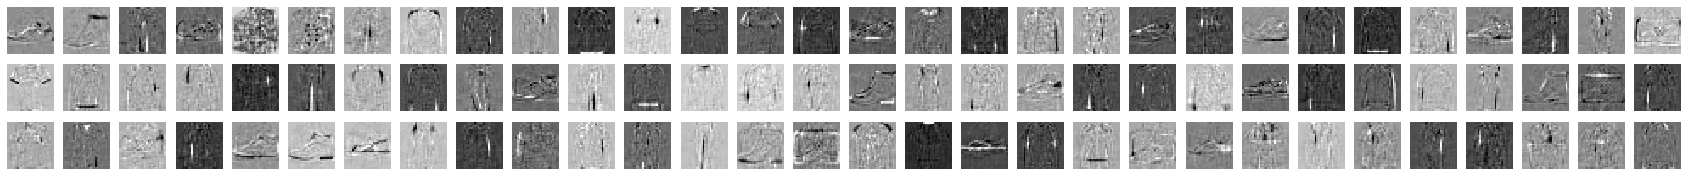

In [89]:
sk_ica = FastICA(n_components=90,algorithm='parallel',fun='logcosh',max_iter=200)
temp   = sk_ica.fit_transform(train_data[:90,:].T).T
showimages(temp.reshape(temp.shape[0],28,28))

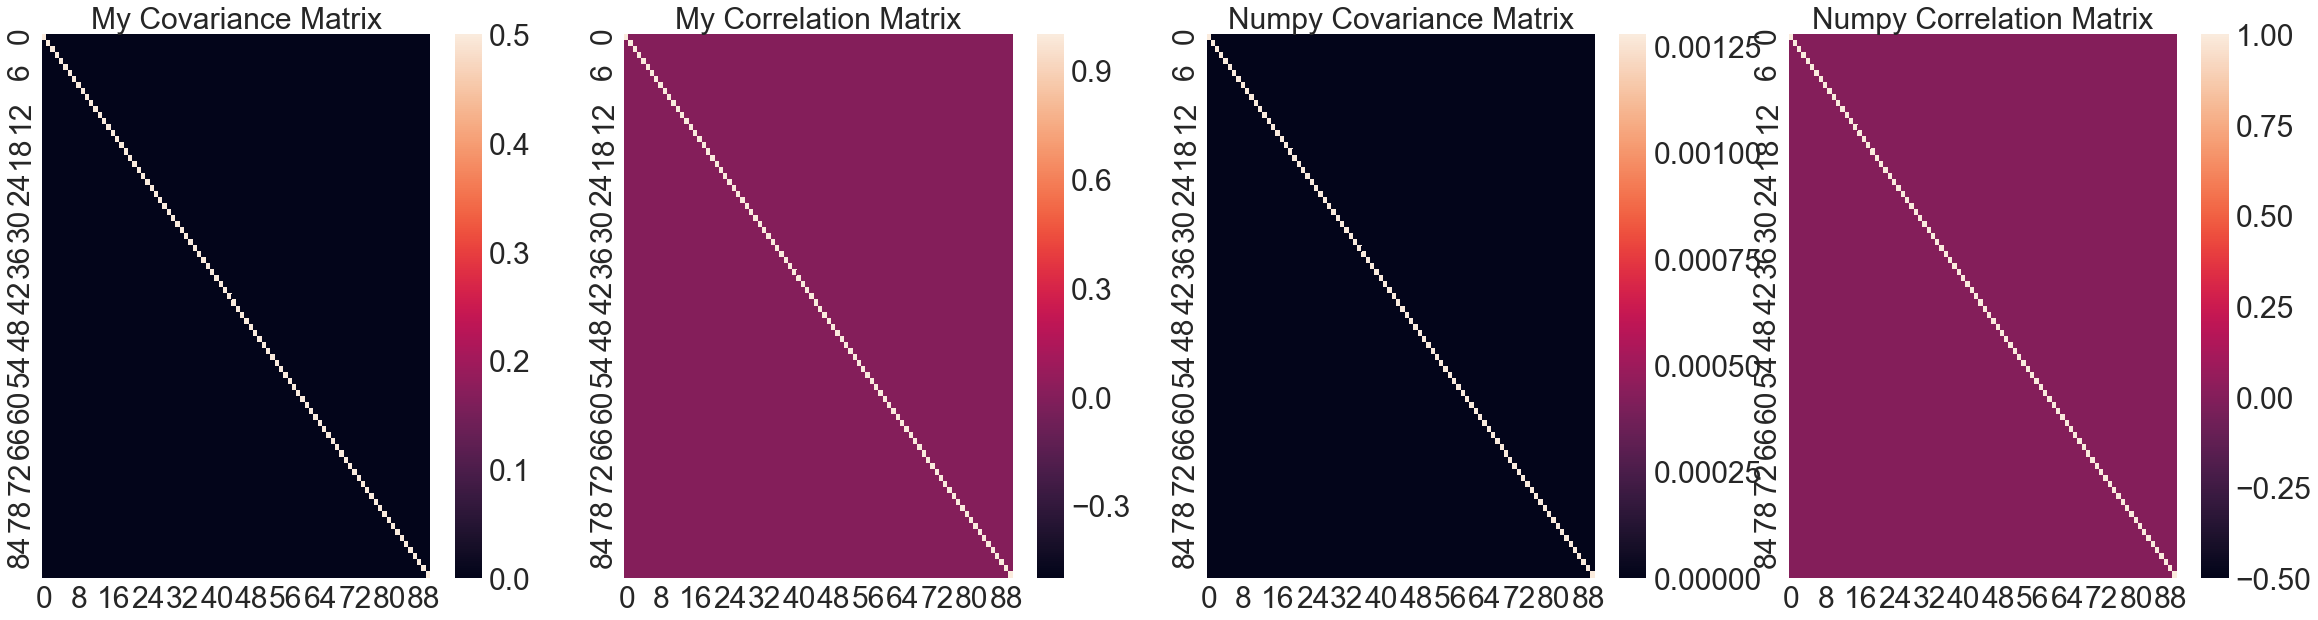

In [90]:
# 
plt.figure(figsize=(40,10))
temp_cen = temp - temp.mean(1)[:,None]
covariance_mat = temp_cen @ temp_cen.T / (dis_all.shape[1])

temp_cen_std = temp_cen / temp_cen.std(1)[:,None]
correlation_mat= temp_cen_std @ temp_cen_std.T / (temp_cen_std.shape[1])
sns.set(font_scale=3.)
plt.subplot(141); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(142); sns.heatmap(correlation_mat,vmin=-0.5);  plt.title('My Correlation Matrix',fontsize=30);

plt.subplot(143); sns.heatmap(np.cov(temp));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(144); sns.heatmap(np.corrcoef(temp),vmin=-0.5 ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

In [91]:
# Get the certain STL 10 Data
from skimage import util 
data_location = "../../Dataset/STL10/img/2/"
train_data = []  # create an empty list
for dirName, subdirList, fileList in sorted(os.walk(data_location)):
    for filename in fileList:
        if ".png" in filename.lower() :
            train_data.append(os.path.join(dirName,filename))

import warnings
warnings.filterwarnings("ignore")
image_resize_px = 64
train_batch = np.zeros(shape=(len(train_data),image_resize_px,image_resize_px,3))
for file_index in range(len(train_data)):
    train_batch[file_index] = resize(imread(train_data[file_index]),(image_resize_px,image_resize_px))

# print out the data shape and the max and min value
print('Train batch, min, max : ',train_batch.shape,train_batch.min(),train_batch.max())

Train batch, min, max :  (500, 64, 64, 3) 0.0 1.0


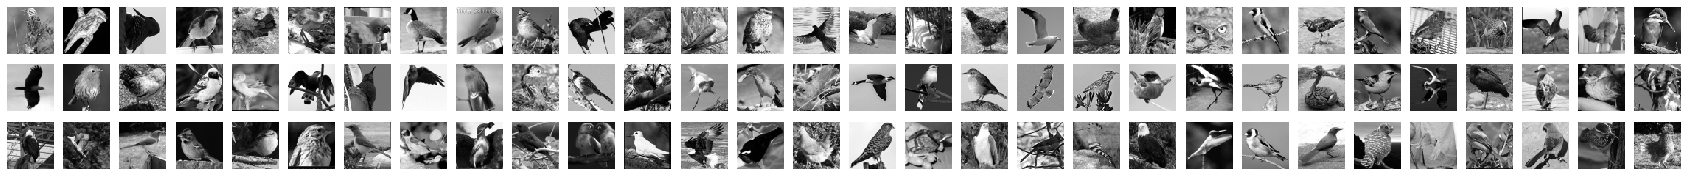

In [81]:
showimages(train_batch,col=T)

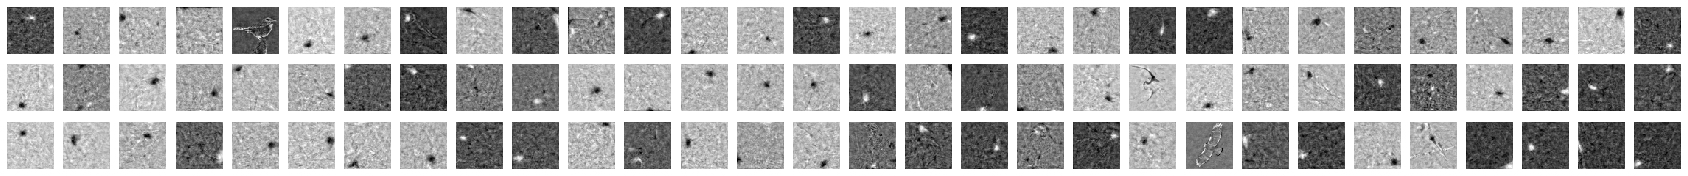

In [82]:
sk_ica = FastICA(n_components=90,algorithm='parallel',fun='logcosh',max_iter=200)
temp   = sk_ica.fit_transform(train_batch[:90,:].reshape((90,-1)).T).T
showimages(temp.reshape(temp.shape[0],64,64))

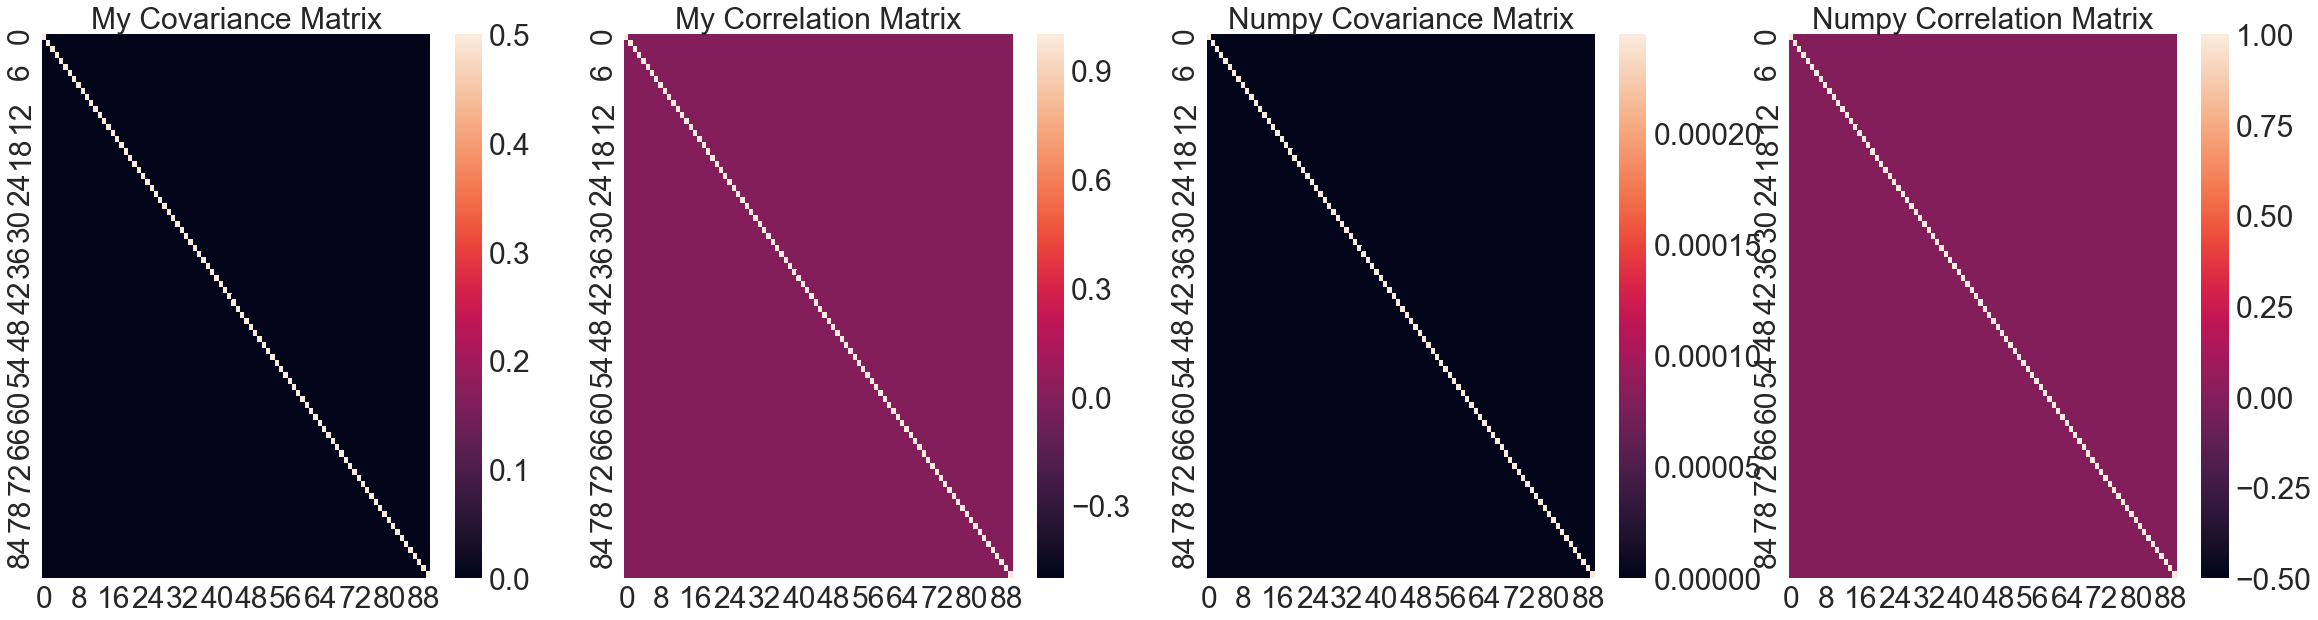

In [83]:
# 
plt.figure(figsize=(40,10))
temp_cen = temp - temp.mean(1)[:,None]
covariance_mat = temp_cen @ temp_cen.T / (dis_all.shape[1])

temp_cen_std = temp_cen / temp_cen.std(1)[:,None]
correlation_mat= temp_cen_std @ temp_cen_std.T / (temp_cen_std.shape[1])
sns.set(font_scale=3.)
plt.subplot(141); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(142); sns.heatmap(correlation_mat,vmin=-0.5);  plt.title('My Correlation Matrix',fontsize=30);

plt.subplot(143); sns.heatmap(np.cov(temp));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(144); sns.heatmap(np.corrcoef(temp),vmin=-0.5 ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

In [3]:
! git all-go

[master 9f0ea5be] s
 2 files changed, 493 insertions(+), 110 deletions(-)


The file will have its original line endings in your working directory.
The file will have its original line endings in your working directory.
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   b459e543..9f0ea5be  master -> master


In [ ]:
# # reference
# Holtz, Y. (2017). #92 Control color in seaborn heatmaps. The Python Graph Gallery. Retrieved 21 October 2018, from https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
# numpy.corrcoef — NumPy v1.15 Manual. (2018). Docs.scipy.org. Retrieved 21 October 2018, from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.corrcoef.html
# numpy.cov — NumPy v1.15 Manual. (2018). Docs.scipy.org. Retrieved 21 October 2018, from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cov.html#numpy.cov
# http://users.stat.umn.edu/~helwig/notes/datamat-Notes.(2018). Users.stat.umn.edu. Retrieved 21 October 2018, from http://users.stat.umn.edu/~helwig/notes/datamat-Notes.pdf
# Covariance Matrix . (2018). Stattrek.com. Retrieved 21 October 2018, from https://stattrek.com/matrix-algebra/covariance-matrix.aspx
# covariance?, H. (2018). How would you explain the difference between correlation and covariance?. Cross Validated. Retrieved 21 October 2018, from https://stats.stackexchange.com/questions/18082/how-would-you-explain-the-difference-between-correlation-and-covariance
# matplotlib, H. (2018). Hide axis values in matplotlib. Stack Overflow. Retrieved 21 October 2018, from https://stackoverflow.com/questions/37039685/hide-axis-values-in-matplotlib/37045694
# plots, H. (2018). Hiding axis text in matplotlib plots. Stack Overflow. Retrieved 21 October 2018, from https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots